In [1]:
from pyplasm import *
from larlib import *
import numpy as np

Evaluating fenvs.py..
('...fenvs.py imported in', 0.006741000000000108, 'seconds')


# PROGETTO VILLA FOSCARI
Questo è il progetto della villa foscari fatto per il corso di Grafica.
Di seguito metto foto della villa (fronte e retro) e del risultato da me ottenuto (fronte e retro). Scorrendo verso il basso si potranno vedere le varie strutture fatte e tutti gli elementi che caratterizzano l'edificio, come colonne o finestre.
![frontevilla.png](img/frontevilla.png)
![frontcas.png](img/frontcas.png)
![posteriorevillafoscari.jpg](img/posteriorevillafoscari.jpg)
![postcasa.png](img/postcasa.png)

In [ ]:
def stanza (x,y,z):
    """Creo una singola stanza con le pareti spesse 1 """
    cubo = CUBOID([x+3,y+3,z])
    cuboDaSottrarre = T([1,2])([1,1])(CUBOID([x+1,y+1,z]))
    return DIFFERENCE([cubo,cuboDaSottrarre])

In [ ]:
def getMapSemiarco(r,altezza):
    x = lambda p : r*sin(p[0])*cos(p[0])
    y = lambda p : r*cos(p[0])*cos(p[0])
    z = lambda p : altezza
    dom = INTERVALS(PI/2)(63)

    map = MAP([x,y,z])(dom)
    return map

def getMap(r,altezza):
    x = lambda p : r*sin(p[0])*cos(p[0])
    y = lambda p : r*cos(p[0])*cos(p[0])
    z = lambda p : altezza
    dom = INTERVALS(PI)(32)

    map = MAP([x,y,z])(dom)
    
    return map
def hex_material(color, light, trasparence):

    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return map(lambda x: x/255., list(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)))

    params = hex_to_rgb(color) + [.1] + \
             hex_to_rgb(light) + [trasparence] +\
             hex_to_rgb(light) + [.1] +\
             hex_to_rgb("#000000") + [.1] +\
             [100]

    return MATERIAL(params)

def getVetro(altezza,larghezza,spessore):
    vetro = CUBOID([altezza,spessore,larghezza])
    vetro = hex_material("#ffffff", "#ffffff", .4)(vetro)
    return vetro

# Modello di una stanza
![stanza.png](img/stanza.png)

In [ ]:
"""crea il piano terrra costruendo per mezzo della piantina recuperata sul sito della villa foscari,detta Malcontenta"""

def groundzero(h,n=0):
    

#costruisco stanza per stanza 
    stanza1=stanza(24,12,h)
    stanza2=stanza(24,12,h)
    stanza3=stanza(16,16,h)
    stanza4=stanza(16,16,h)
    stanza5=stanza(16,12,h)
    stanza6=stanza(16,12,h)
    stanza7=stanza(6,13,h)
    stanza8=stanza(6,13,h)
#costruisco la grande stanza a croce centrale
    if n==1:
        h=h-8
    croce1=(stanza(16,45,h))
    croce2=stanza(32,16,h)
    croce=STRUCT([T([1,2])([-8,14])(croce2),croce1])
    stanzacentrale=DIFFERENCE([croce,T(2)(15)(stanza(16,14,h))])
    stanzacentrale=DIFFERENCE([stanzacentrale,T([1,2])([1,14])(stanza(14,16,h))])
    primoasset=STRUCT([stanza1,T(1)(44)(stanza2),T(1)(26)(stanzacentrale)])
    secondoasset=STRUCT([primoasset,T(2)(14)(stanza4),T(2)(32)(stanza6),T([1,2])([18,32])(stanza8)])
    terzoasset=STRUCT([secondoasset,T([1,2])([52,14])(stanza3),T([1,2])([52,32])(stanza5),T([1,2])([44,32])(stanza7)])
    cubo=CUBOID([33,6,h])
    #terzoasset=DIFFERENCE([terzoasset,T([1,2])([19,46])(cubo)])
    return terzoasset
#VIEW(groundzero(2))


# Vista del piano terra costruito con un altezza fissata a 2 per far vedere bene la pianta
![pianta.png](img/pianta.png)

# Foto piano con inserimento porte
![piantaporte.png](img/piantaporte.png)

In [ ]:
def column(dm, h, h_base):
    """Costruisce una colonna ionica con i seguenti parametri dm= diametro
        h=altezza del corpo 
        h_base = altezza della base
    """
    dm = float(dm)
    h = float(h)
    h_base = float(h_base)
    
    volute = INTERVALS(2*PI)(32)
    xVol = lambda p: cos(p[0])*0.3
    yVol = lambda p: sin(p[0])*0.3

    volute1 = JOIN(SWEEP([0.0,dm,0.0])(R([2,3])(PI/2)(MAP([xVol,yVol])(volute))))
    volute2 = JOIN(SWEEP([0.0,dm,0.0])(R([2,3])(PI/2)(MAP([xVol,yVol])(volute))))
    baseTop = COMP([T(3)(0.065), CUBOID])([dm +dm/4, dm, dm*1/6])
    capital = STRUCT([volute1, baseTop, T(1)(dm+dm/5)(volute2),
                      T([1, 2, 3])([dm*3./5, dm*6/12, -dm*0.39])(COMP([JOIN, TRUNCONE([dm*0.4, dm*1/2, dm*3/7])])(24))])
    
    cylinder = COMP([JOIN, TRUNCONE([dm/2, .8*dm/2, h])])(24)
    roundBase = TOP([CYLINDER([dm/2.+0.15, 0.2])(32),CYLINDER([dm/2.+0.1, 0.1])(32)])
    base = COMP([T([1, 2])([-0.62*dm, -0.5*dm]), CUBOID])([dm+0.5, dm*1.4, h_base])
    
    return TOP([TOP([TOP([base, roundBase]), cylinder]), capital])
VIEW(column(3,14,5))
def columna(dm,h,h_base):
    cylndr = COMP([JOIN,TRUNCONE([dm/1.8,0.8*(dm/1.8),h])])(24)
    #torus_bot = COMP([JOIN,TORUS([dm/12,dm/2])])([8,24])
    torus_bot=COMP([JOIN,TORUS([dm/1.8,dm/3.])])([38,38])
    torus_bot=STRUCT([torus_bot,T(3)(0.5)(TORUS([dm/2.1,dm/3.])([38,38]))])
    torus_bot=JOIN([torus_bot,T(3)(0.5)(TORUS([dm/1.8,dm/3.])([38,38]))])
    torus_bot=JOIN([torus_bot])
    torus_top = COMP([JOIN,TORUS([0.8*(dm/12),0.8*(dm/2)])])([8,27])
       
    base = COMP([T([1,2])([7*(dm/-12),7*(dm/-23)]),CUBOID])([7*(dm/6),7*(dm/6),h_base])
    
    base_top = COMP([T([1,2])([7*(dm/-12),7*(dm/-12)]),CUBOID])([7*(dm/6),7*(dm/6),dm/6])
    
    capital = SUM([COMP([JOIN,TRUNCONE([0.8*dm/2, 1.2*dm/2,h/8])])(4),COMP([R([1,2])(PI/4),JOIN,TRUNCONE([0.8*dm/2,1.2*dm/2,
                                                                                                         h/8])])(4)]) 
    return (TOP([TOP([TOP([TOP([TOP([base, torus_bot]), TEXTURE("texture/colonna.jpg")(cylndr)]), torus_top]), capital]), base_top]))
#VIEW(columna(4,16,2))

In [ ]:
"""Nella struttura originale sono presenti circa 8 differenti strutture per finestre che ho cercato di riprodurre nel modo più 
    similare e verosimile possibile"""
# Finestra ad arco posteriore

def getcirc(lunghezza,spessore,altezza):    
    Parete = COLOR([0.9,0.8,0.7])(CUBOID([spessore,lunghezza,altezza]))
    
    diametro_arco = lunghezza*0.70
    Arco = T([1,2,3])([spessore*1.5,lunghezza/2.0,altezza*0.05])(R([1,3])(PI/2)(JOIN([T(2)(-diametro_arco*0.5)(getMapSemiarco(diametro_arco,0)),T(2)(-diametro_arco*0.5)(getMapSemiarco(diametro_arco,spessore*2))])))
    
    Finestra1 = DIFFERENCE([Parete,Arco])
    Finestra1 = COLOR([0.9,0.8,0.7])(Finestra1)
    Pilastro = COLOR([0.9,0.8,0.7])(CUBOID([spessore,diametro_arco/8.0,altezza]))

    Vetro = T(1)(spessore/2.0)(getVetro(0.05,altezza,lunghezza))
    
    Finestra = STRUCT([Finestra1,T(2)(lunghezza*0.3)(Pilastro),T(2)(lunghezza*0.7-diametro_arco/8.0)(Pilastro),Vetro])
    
    return(Finestra)
#VIEW(getcirc(15,2,6))

def finestrepiccole():
        grata1=CUBOID([0.25,0.25,4])
        grataor=CUBOID([4,0.25,0.25])
        GRATE=STRUCT([T(1)(1)(grata1),T(1)(2)(grata1),T(1)(3)(grata1),
                     T(3)(1)(grataor),T(3)(2)(grataor),T(3)(3)(grataor)])
        GRATE=COLOR(BLACK)(GRATE)
        cornicever=CUBOID([0.125,1,4])
        cornice=CUBOID([4,1,0.125])
        cornices=COLOR([0.37,0.25,0])(STRUCT([CUBOID([4,1,0.26]),CUBOID([0.26,1,4]),T(1)(1.75)(CUBOID([0.26,1,4])),
                       T(1)(3.75)(CUBOID([0.26,1,4])),T(3)(3.75)(CUBOID([4,1,0.26])),
                       T(1)(1)(cornicever),T(1)(2.75)(cornicever),
                       T(3)(1.5)(cornice),T(3)(2.5)(cornice)
                       ]))
        vetro=T(1)(2)(getVetro(0.05,4,4))
        vetro=R([1,2])(PI/2)(vetro)
        
        vetro=STRUCT([vetro,T([1,2])([-4,1.5])(GRATE),T([1,2])([-4,1.55])(cornices)])
        return vetro
#VIEW(finestrepiccole())
  
def finestregrandi():

    grata1=CUBOID([0.2,1,8])
    grataor=CUBOID([4,1,0.2])
    cornice=CUBOID([4,1,0.26])
    corniceV=CUBOID([0.26,1,8])
    GRATE=STRUCT([cornice,corniceV,T(1)(3.75)(corniceV),
                 T(1)(1.75)(corniceV),T(1)(2)(corniceV),
                 T(3)(7.75)(cornice),T(3)(3.75)(cornice),
                 T(1)(0.625)(grata1),T(1)(1)(grata1),T(1)(1.375)(grata1),
                 T(1)(2.625)(grata1),T(1)(3)(grata1),T(1)(3.325)(grata1),
                 T(3)(1.15)(grataor),T(3)(1.80)(grataor),T(3)(2.45)(grataor),
                 T(3)(3.1)(grataor),
                 T(3)(4.9)(grataor),T(3)(5.55)(grataor),T(3)(6.2)(grataor),T(3)(6.85)(grataor)])
    GRATE=COLOR([0.37,0.25,0])(GRATE)
    vetro=T(1)(2)(getVetro(0.05,8,4))
    vetro=R([1,2])(PI/2)(vetro)
    vetro=T([1,2])([4,-2])(vetro)
    vetro=STRUCT([vetro,T(2)(-0.05)(GRATE)])
    return vetro
#VIEW(finestregrandi())
def finestregrandiF():
    grata1=CUBOID([0.125,1,8])
    grataor=CUBOID([3,1,0.125])
    cornice=CUBOID([3,1,0.36])
    corniceV=CUBOID([0.36,1,8])
    GRATE=STRUCT([cornice,corniceV,T(1)(2.65)(corniceV),
                 T(1)(1.25)(corniceV),T(1)(1.5)(corniceV),
                 T(3)(7.65)(cornice),T(3)(3.75)(cornice),
                 T(1)(0.75)(grata1),
                 T(1)(2.25)(grata1),
                 T(3)(1.15)(grataor),T(3)(1.80)(grataor),T(3)(2.45)(grataor),
                 T(3)(3.1)(grataor),
                 T(3)(4.9)(grataor),T(3)(5.55)(grataor),T(3)(6.2)(grataor),T(3)(6.85)(grataor)])
    GRATE=COLOR([0.37,0.25,0])(GRATE)
    vetro=T(1)(2)(getVetro(0.05,8,3))
    vetro=R([1,2])(PI/2)(vetro)
    vetro=T([1,2])([3,-2])(vetro)
    vetro=STRUCT([vetro,T(2)(-0.05)(GRATE)])
    return vetro
#VIEW(finestregrandiF())
def finestrepiccoline():
        cornicever=CUBOID([0.125,1,6])
        cornice=CUBOID([4,1,0.125])
        cornices=COLOR([0.37,0.25,0])(STRUCT([CUBOID([4,1,0.51]),CUBOID([0.51,1,6]),T(1)(1.75)(CUBOID([0.51,1,6])),
                       T(1)(3.5)(CUBOID([0.51,1,6])),T(3)(5.5)(CUBOID([4,1,0.51])),
                       T(1)(1)(cornicever),T(1)(2.75)(cornicever),
                       T(3)(1.5)(cornice),T(3)(2.5)(cornice),T(3)(3.5)(cornice),T(3)(4.5)(cornice)
                       ]))
        vetro=T(1)(2)(getVetro(0.05,6,4))
        vetro=R([1,2])(PI/2)(vetro)
        vetro=T([1,2])([4,-2])(vetro)
        
        vetro=STRUCT([vetro,T(2)(-0.05)(cornices)])
        return vetro
#VIEW(finestrepiccoline())
def buco():
    cornice=CUBOID([4,1,0.6])
    cornicever=CUBOID([0.6,1,3])
    cornice=STRUCT([cornice,cornicever,T(1)(3.4)(cornicever),T(3)(2.4)(cornice)])
    vetro=T(1)(2)(getVetro(0.05,3,4))
    vetro=R([1,2])(PI/2)(vetro)
    vetro=T([1,2])([4,-1.4])(vetro)    
    vetro=STRUCT([vetro,COLOR([0.37,0.25,0])(cornice)])
    return vetro
#VIEW(buco())
def finestraconbalaustra():
    vetro=T(1)(2)(getVetro(0.05,6.5,4))
    vetro=R([1,2])(PI/2)(vetro)
    vetro=T([1,2])([4,-2])(vetro)
    corniceV=COLOR([0.37,0.25,0])(CUBOID([0.5,0.5,7]))
    corniceO=COLOR([0.37,0.25,0])(CUBOID([4,0.5,0.5]))
    finestra=STRUCT([corniceV,T(3)(6.5)(corniceO),T(1)(3.5)(corniceV),T([1])([0.5])(vetro)])
    colonna=columna(0.4,1.5,0.4)
    colonnatino=STRUCT([T(1)(0.6)(colonna),T(1)(1.3)(colonna),T(1)(2)(colonna),T(1)(2.7)(colonna),T(1)(3.4)(colonna)])
    latoverticale=CUBOID([.35,0.5,2.5])
    latoriziontale=CUBOID([4,0.5,0.5])
    balaustra=STRUCT([T([2,3])([1,2.5])(latoriziontale),T(2)(1)(latoriziontale),T(2)(1)(latoverticale),T(2)(1.25)(colonnatino),T([1,2])([3.65,1])(latoverticale)])
    return STRUCT([T(3)(-2)(vetro),T([2,3])([-1.5,-2])(balaustra)])
#VIEW(finestraconbalaustra())
def finestramansarda_piccola():
    vetro=T(1)(2)(getVetro(0.05,2,2))
    vetro=R([1,2])(PI/2)(vetro)
    vetro=T([1,2])([4,-2])(vetro)
    corniceverticale=CUBOID([3,1,0.5])
    corniceorizzontale=CUBOID([0.5,1,3])
    cornice=STRUCT([corniceverticale,corniceorizzontale,T(3)(2.5)(corniceverticale),T(1)(1.25)(corniceorizzontale),T(1)(2.5)(corniceorizzontale)])
    cornice=COLOR([0.37,0.25,0])(cornice)
    return STRUCT([cornice,T([1,2,3])([-1.5,0.25,0.5])(vetro)])
#VIEW(finestramansarda_piccola())
def finestramansarda_grande():
    vetro=T(1)(2)(getVetro(0.05,2,3))
    vetro=R([1,2])(PI/2)(vetro)
    vetro=T([1,2])([4,-2])(vetro)
    corniceverticale=CUBOID([4,1,0.5])
    corniceorizzontale=CUBOID([0.5,1,3])
    cornice=STRUCT([corniceverticale,corniceorizzontale,T(3)(2.5)(corniceverticale),T(1)(1.5)(corniceorizzontale),T(1)(2)(corniceorizzontale),T(1)(3.5)(corniceorizzontale)])
    cornice=COLOR([0.37,0.25,0])(cornice)
    return STRUCT([cornice,T([1,2,3])([-0.5,0.25,0.5])(vetro)])
#VIEW(finestramansarda_grande())


# Modelli Finestre
![fin2.png](img/fin2.png)
![fin.png](img/fin.png)
![fin4.png](img/fin4.png)
![fin6.png](img/fin6.png)
![fin3.png](img/fin3.png)
![fin7.png](img/fin7.png)
![fin8.png](img/fin8.png)
![fincirc.png](img/fincirc.png)
![fin5.png](img/fin5.png)

In [ ]:
def mettiporte():
    """inserisco le fessure per le porte"""
    porte=STRUCT([T([1,2])([34,45])(CUBOID([3,6,8])),T(1)(34)(CUBOID([3,6,8])),T([1,2])([24,6])(CUBOID([6,3,8])),T([1,2])([40,6])(CUBOID([6,3,8]))
                ,T([1,2])([8,12])(CUBOID([3,6,8])),T([1,2])([62,12])(CUBOID([3,6,8]))
                ,T([1,2])([8,28])(CUBOID([3,6,8])),T([1,2])([62,28])(CUBOID([3,6,8])),T([1,2])([16,23])(CUBOID([6,3,8])),T([1,2])([48,23])(CUBOID([6,3,8])),
                  T([1,2])([16,38])(CUBOID([6,3,8])),T([1,2])([48,38])(CUBOID([6,3,8])),
                 T([1,2])([22,38])(CUBOID([6,3,8])),T([1,2])([42,38])(CUBOID([6,3,8]))])
    piano=groundzero(11)
    pian0piuporte=DIFFERENCE([piano,porte])
    return pian0piuporte
#VIEW(mettiporte())
def mettifinestre(piano):
    """inserisco le fessure delle finestre stando attento a rispettare le proporzioni della casa"""
    finestre=STRUCT([T([2,3])([6,4])(CUBOID([4.01,4.01,4.01])),T([2,3])([22,4])(CUBOID([4.01,4.01,4.01])),T([2,3])([36,4])(CUBOID([4.01,4.01,4.01])),
                     T([1,2,3])([6,46,4])(CUBOID([4.01,4.01,4.01])),T([1,2,3])([62,46,4])(CUBOID([4.01,4.01,4.01])),
                    T([1,2,3])([68,6,4])(CUBOID([4.01,4.01,4.01])),T([1,2,3])([68,22,4])(CUBOID([4.01,4.01,4.01])),T([1,2,3])([68,36,4])(CUBOID([4.01,4.01,4.01])),
                    T([1,2,3])([20,46,4])(CUBOID([4.01,4.01,4.01])),T([1,2,3])([28,46,4])(CUBOID([4.01,4.01,4.01])),T([1,2,3])([39,46,4])(CUBOID([4.01,4.01,4.01])),
                    T([1,2,3])([46.5,46,4])(CUBOID([4.01,4.01,4.01]))])
    nuovopiano=DIFFERENCE([piano,finestre])
    return nuovopiano


# piano terra con porte e finestre
![pianoterra2.png](img/pianoterra2.png)


In [ ]:
def porticatofrontale(piano):
    """aggiungo la struttura sotto al porticato che è composta da due stanze ed un corridoio"""
    stanzaDX=stanza(13,11,11)
    stanzaSX=stanzaDX
    stanzaDX=DIFFERENCE([stanzaDX,T([1,3])([3,4])(CUBOID([4,4,4])),T([1,3])([10,4])(CUBOID([4,4,4])),T([1,2])([14.5,4])(CUBOID([6,3,8]))])
    stanzaSX=DIFFERENCE([stanzaSX,T([1,3])([3,4])(CUBOID([4,4,4])),T([1,3])([9,4])(CUBOID([4,4,4])),T(2)(4)(CUBOID([6,3,8]))])
    portone=CUBOID([6,1,11])
    portone=DIFFERENCE([portone,T(1)(1)(CUBOID([4,1,8]))])
    porticatofrontale=STRUCT([stanzaDX,T(1)(16)(portone),T(1)(22)(stanzaSX)])
    porticatofrontale=COLOR([0.9,0.8,0.7])(porticatofrontale)
    porticatofrontale=STRUCT([porticatofrontale,T([1,2,3])([7,-1.5,4])(finestrepiccole()),T([1,2,3])([14,-1.5,4])(finestrepiccole()),T([1,2,3])([29,-1.5,4])(finestrepiccole()),T([1,2,3])([35,-1.5,4])(finestrepiccole())])
    pianocompleto=STRUCT([T(1)(16.5)(porticatofrontale),T(2)(14)(piano)])
    return  pianocompleto
#VIEW(porticatofrontale(groundzero(11)))

# pianoterra con aggiunta del porticato 
![pianoterraconporticato.png](img/pianoterraconporticato.png)
# Piano Terra con Colori 
![pianoterraconpav.png](img/pianoterraconpav.png)

In [ ]:
def pavimento(piano):
    """una volta fatto il piano terra e colorato il piano inserisco il pavimento con delle texture
        , siccome la struttura era fatta per essere speculare con il mezzo in comune ho deciso
        di utilizzare le texture simili per le due sezioni quella di destra e quella di sinistra"""
    stanza1=TEXTURE("texture/parquet.jpg")(CUBOID([26,14,1]))
    stanza2=TEXTURE("texture/parquet.jpg")(CUBOID([26,14,1]))
    stanza3=TEXTURE("texture/marmo.jpeg")(CUBOID([18,18,1]))
    stanza4=TEXTURE("texture/marmo.jpeg")(CUBOID([18,18,1]))
    stanza5=TEXTURE("texture/pavimento.jpeg")(CUBOID([18,14,1]))
    stanza6=TEXTURE("texture/pavimento.jpeg")(CUBOID([18,14,1]))
    stanza7=TEXTURE("texture/parquet.jpeg")(CUBOID([34,18,1]))
    stanza8=TEXTURE("texture/parquet.jpeg")(CUBOID([18,16,1]))
    stanza9=TEXTURE("texture/parquet.jpeg")(CUBOID([18,16,1]))
    stanza10=TEXTURE("texture/parquet.jpg")(CUBOID([8,15,1]))
    stanza11=TEXTURE("texture/parquet.jpg")(CUBOID([8,15,1]))
    primoasset=STRUCT([stanza1,T(1)(44)(stanza2),T(1)(26)(stanza8),T([1,2])([18,32])(stanza10),T([1,2])([44,32])(stanza10)])
    secondoasset=STRUCT([primoasset,T(2)(14)(stanza4),T(2)(32)(stanza6),T([1,2])([26,31])(stanza9)])
    terzoasset=STRUCT([secondoasset,T([1,2])([18,14])(stanza7),T([1,2])([52,14])(stanza3),T([1,2])([52,32])(stanza5)])
    strutturaport=TEXTURE("texture/marmo2.jpeg")(STRUCT([CUBOID([38,15,1])]))
    return STRUCT([piano,T([1,2,3])([1,15,-1])(terzoasset),T([1,2,3])([16.5,0,-1])(strutturaport)])
def soffitto(piano):
    stanza1=TEXTURE("texture/parquet.jpg")(CUBOID([25,13,1]))
    stanza2=TEXTURE("texture/parquet.jpg")(CUBOID([25,13,1]))
    stanza3=TEXTURE("texture/marmo.jpeg")(CUBOID([17,17,1]))
    stanza4=TEXTURE("texture/marmo.jpeg")(CUBOID([17,17,1]))
    stanza5=TEXTURE("texture/pavimento.jpeg")(CUBOID([17,13,1]))
    stanza6=TEXTURE("texture/pavimento.jpeg")(CUBOID([17,13,1]))
    stanza7=TEXTURE("texture/parquet.jpeg")(CUBOID([33,17,1]))
    stanza8=TEXTURE("texture/parquet.jpeg")(CUBOID([17,14,1]))
    stanza9=TEXTURE("texture/parquet.jpeg")(CUBOID([17,15,1]))
    points=[[0,0],[4,0],[4,5],[7,5],[0,14],[7,14]]
    edges = [[1,2,3,5],[3,4,6,5],[1,2],[2,3],[3,5],[5,1],[3,4],[4,6],[6,5],[5,3]]
    stanza= MKPOL([points, edges, []])
    stanza10=POWER([stanza,QUOTE([1])])
    stanza10=TEXTURE("texture/parquet.jpg")(stanza10)
    primoasset=STRUCT([stanza1,T(1)(44)(stanza2),T(1)(26)(stanza8)])
    secondoasset=STRUCT([primoasset,T(2)(14)(stanza4),T(2)(32)(stanza6),T([1,2])([26,31])(stanza9),T([1,2])([18,32])(stanza10),T([1,2])([44,32])(stanza10)])
    terzoasset=STRUCT([secondoasset,T([1,2])([18,14])(stanza7),T([1,2])([52,14])(stanza3),T([1,2])([52,32])(stanza5)])
    strutturaport=TEXTURE("texture/marmo2.jpeg")(STRUCT([CUBOID([38,14,2])]))
    return STRUCT([piano,T([1,2,3])([1,15,10])(terzoasset),T([1,2,3])([16.5,0,9.5])(strutturaport)])


# Colonne
La prima la uso per le finestre con balaustre, la seconda per il colonnato
![colonnaTemp.png](img/colonnaTemp.png)
![colonnaionica.png](img/colonnaionica.png)

In [ ]:
def colonnato(piano):
    """inserisco sopra la struttura del porticato costruita in precedenza un colonnato"""
    piano=piano
    colonna=column(2,15.6,2)
    colonnato=STRUCT([T([1,2,3])([17.5,1.5,11])(colonna),T([1,2,3])([24.5,1.5,11])(colonna),
                      T([1,2,3])([31.25,1.5,11])(colonna),T([1,2,3])([39.75,1.5,11])(colonna),
                      T([1,2,3])([46,1.5,11])(colonna),T([1,2,3])([53,1.5,11])(colonna),
                      T([1,2,3])([17.5,6.5,11])(colonna),T([1,2,3])([17.5,11.5,11])(colonna),
                      T([1,2,3])([53,6.5,11])(colonna),T([1,2,3])([53,11.5,11])(colonna),piano])
    return colonnato
def Gable (radius,h,n):
    
    lastX = n*3*(2*radius*1.2)
    triangle = MKPOL([[[0,0],[lastX,0],[lastX/2.0,h/2]],[[1,2,3]],[[1]]])
    return R([2,3])(PI/2)(POWER([triangle,QUOTE([radius*15])]))

def triangolo(piano):
    """insieme alla funzione Gable permette di creare un tetto triangolare in 3 dimensioni
    da inserire sopra il porticato"""
    lastra=COLOR([0.59,0.46,0.32])(CUBOID([39.5,15,0.5]))
    porticaten=STRUCT([piano,T([1,2,3])([15.5,-1,30])(lastra)])
    gable=Gable(1,19,5.5)
    c=Gable(1,15,4.75)
    gable=DIFFERENCE([gable,T(2)([20])(CUBOID([75,20,9]))])
    c=DIFFERENCE([c,T(2)([20.3])(CUBOID([75,20,9]))])
    gable=COLOR([0.59,0.46,0.32])(gable)
    c=COLOR(WHITE)(c)
    gable=STRUCT([gable,T([1,2,3])([2.75,0,0.75])(c)])
    struttura = STRUCT([porticaten,T([1,2,3])([15.5,14,30.5])(gable)])
    return struttura
#VIEW(colonnato(groundzero(3)))
#piano=groundzero(11)
#piano=porticatofrontale(piano)
#VIEW(colonnato(piano))

# Foto colonnato
![Schermata%202018-07-22%20alle%2013.57.08.png](img/Schermata%202018-07-22%20alle%2013.57.08.png)

In [ ]:
def iusscalam():
    """creo la scalinata di SX della struttura con circa 22 scalini"""
    gradus1=CUBOID([1,7,10.75])
    gradus2=CUBOID([1,7,10.25])
    gradus3=CUBOID([1,7,9.75])
    gradus4=CUBOID([1,7,9.25])
    gradus5=CUBOID([1,7,8.75])
    gradus6=CUBOID([1,7,8.25])
    gradus7=CUBOID([1,7,7.75])
    gradus8=CUBOID([1,7,7.25])
    gradi=STRUCT([gradus8,T(1)(1)(gradus7),T(1)(2)(gradus6),T(1)(3)(gradus5),T(1)(4)(gradus4),
                 T(1)(5)(gradus3),T(1)(6)(gradus2),T(1)(7)(gradus1)])
    plata=CUBOID([8.5,7,6.75])
    gradi=STRUCT([plata,T(1)(8.5)(gradi)])
    gradus0=CUBOID([8.5,1,6.25])
    gradus01=CUBOID([8.5,1,5.75])
    gradus02=CUBOID([8.5,1,5.25])
    gradus03=CUBOID([8.5,1,4.75])
    gradus04=CUBOID([8.5,1,4.25])
    gradus05=CUBOID([8.5,1,3.75])
    gradus06=CUBOID([8.5,1,3.25])
    gradus07=CUBOID([8.5,1,2.75])
    gradus08=CUBOID([8.5,1,2.25])
    gradus09=CUBOID([8.5,1,1.75])
    grada=STRUCT([gradus0,T(2)(-1)(gradus01),T(2)(-2)(gradus02),T(2)(-3)(gradus03),T(2)(-4)(gradus04),
                 T(2)(-5)(gradus05),T(2)(-6)(gradus06),T(2)(-7)(gradus07),T(2)(-8)(gradus08),
                 T(2)(-9)(gradus09),T(2)(-13)(CUBOID([8.5,4,1.25])),T(2)(-14)(CUBOID([8.5,1,0.75])),
                 T(2)(-15)(CUBOID([8.5,1,0.25]))])
    gradinata=STRUCT([gradi,T(2)(-1)(grada)])
    return gradinata
#VIEW(iusscalam())


In [ ]:
def gradussinistram():
    """scalinata DX come la struttura di sinistra contiene 22 gradini """
    gradus1=CUBOID([1,7,10.75])
    gradus2=CUBOID([1,7,10.25])
    gradus3=CUBOID([1,7,9.75])
    gradus4=CUBOID([1,7,9.25])
    gradus5=CUBOID([1,7,8.75])
    gradus6=CUBOID([1,7,8.25])
    gradus7=CUBOID([1,7,7.75])
    gradus8=CUBOID([1,7,7.25])
    gradi=STRUCT([gradus1,T(1)(1)(gradus2),T(1)(2)(gradus3),T(1)(3)(gradus4),T(1)(4)(gradus5),
                 T(1)(5)(gradus6),T(1)(6)(gradus7),T(1)(7)(gradus8)])
    plata=CUBOID([8.5,7,6.75])
    gradi=STRUCT([plata,T(1)(-8)(gradi)])
    gradus0=CUBOID([8.5,1,6.25])
    gradus01=CUBOID([8.5,1,5.75])
    gradus02=CUBOID([8.5,1,5.25])
    gradus03=CUBOID([8.5,1,4.75])
    gradus04=CUBOID([8.5,1,4.25])
    gradus05=CUBOID([8.5,1,3.75])
    gradus06=CUBOID([8.5,1,3.25])
    gradus07=CUBOID([8.5,1,2.75])
    gradus08=CUBOID([8.5,1,2.25])
    gradus09=CUBOID([8.5,1,1.75])
    grada=STRUCT([gradus0,T(2)(-1)(gradus01),T(2)(-2)(gradus02),T(2)(-3)(gradus03),T(2)(-4)(gradus04),
                 T(2)(-5)(gradus05),T(2)(-6)(gradus06),T(2)(-7)(gradus07),T(2)(-8)(gradus08),
                 T(2)(-9)(gradus09),T(2)(-13)(CUBOID([8.5,4,1.25])),T(2)(-14)(CUBOID([8.5,1,0.75])),
                 T(2)(-15)(CUBOID([8.5,1,0.25]))])
    gradinata=STRUCT([gradi,T([2])([-1])(grada)])
    return gradinata
#VIEW(gradussinistram())

# Foto scalinata
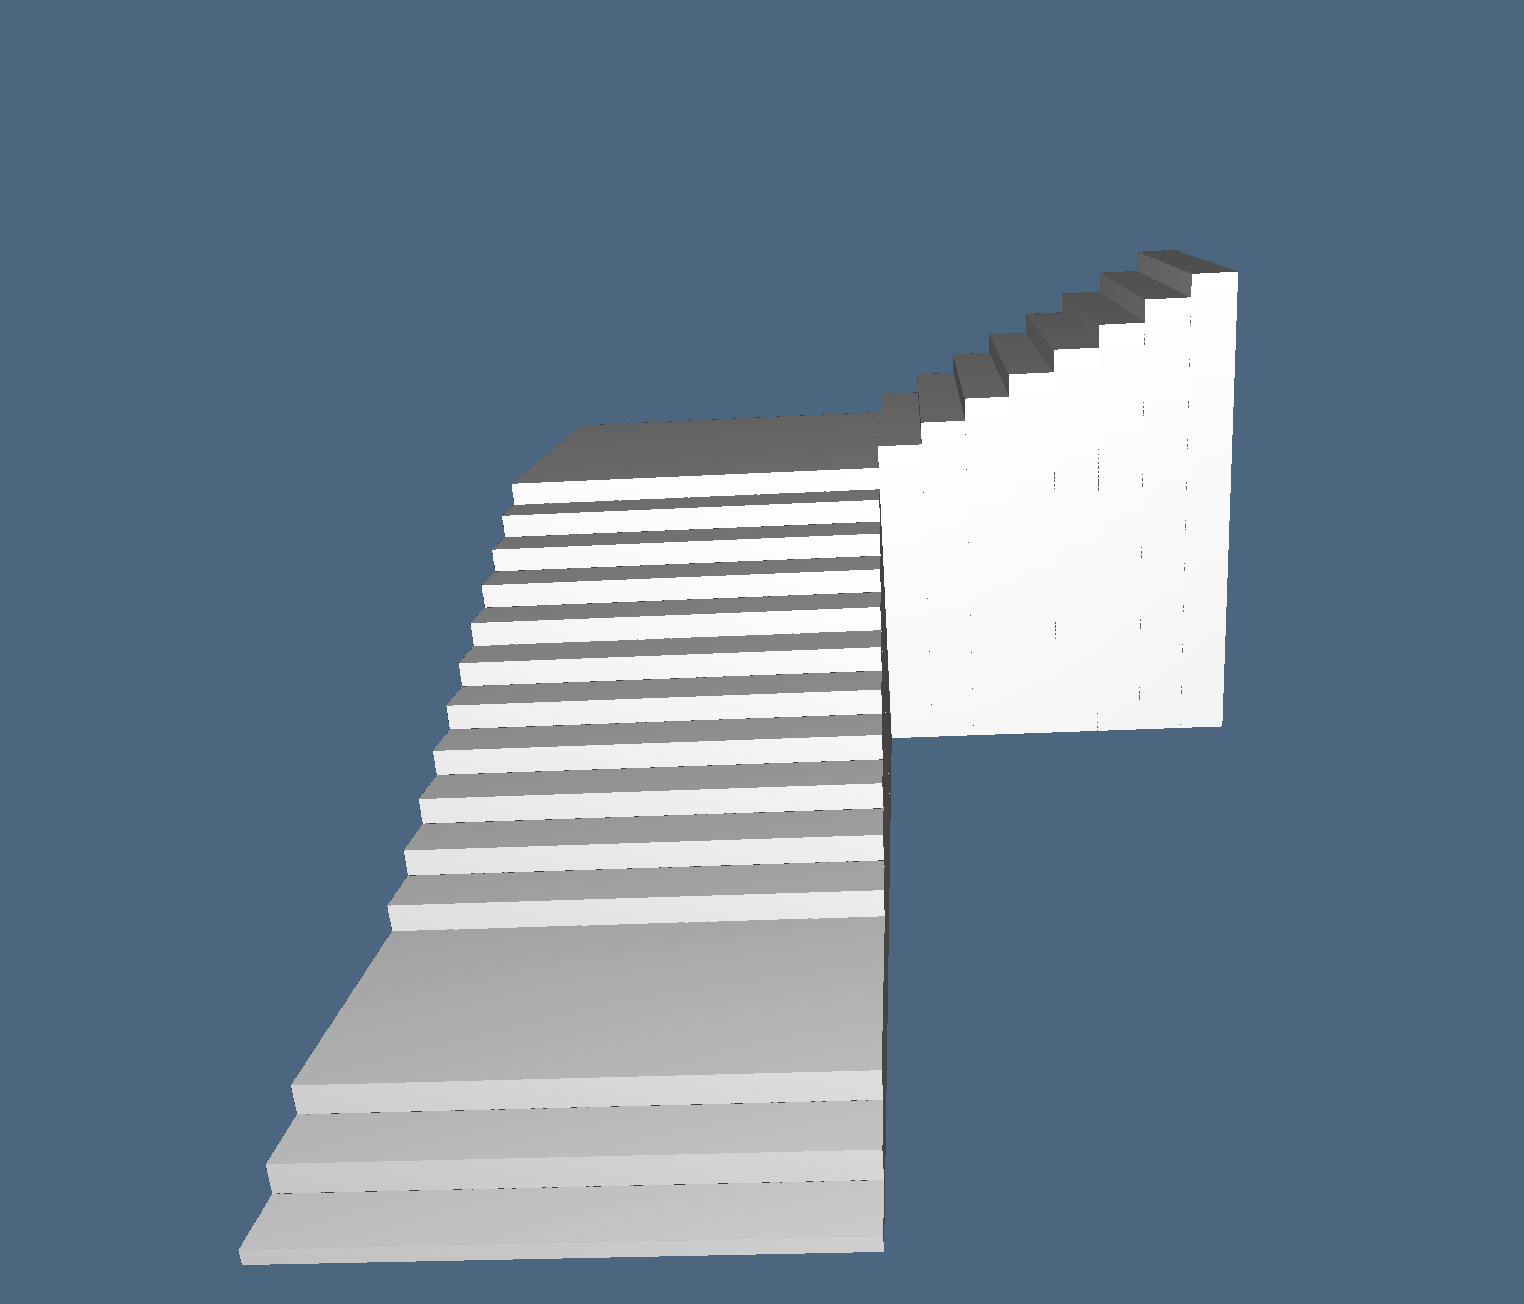

In [ ]:
def completamentopianoterra(pianocolonnato):
    """funzione che inserisce nella struttura con il porticato già inserito le scalinate
    di DX e SX"""
    gradinoSX=gradussinistram()
    gradinoDX=iusscalam()
    return STRUCT([T([1,2])([62.5,7])(gradinoSX),pianocolonnato,T([2])([7])(gradinoDX)])


# Porticato Completo
![pianoterport.png](img/pianoterport.png)
![Schermata%202018-07-22%20alle%2013.57.08.png](img/Schermata%202018-07-22%20alle%2013.57.08.png)


In [ ]:
def cornicione(n):
    #costruisco il cornicione intorno alla casa passo il parametro n che mi indica il lato
    # 1= frontale 2= laterale 3=frontale sinistro 
    # 1,3 sono uguali anche per il retro basta solo ruotarli
    if(n==2):
        cubo1=CUBOID([1.5,47,1.5])
        cubo2=CUBOID([1,47,1.5])
        cubo3=CUBOID([2.5,47,1.5])
        corn=STRUCT([cubo3,T([3])([-1.5])(cubo1),T([3,2])([-3])(cubo2)])
        corninf=STRUCT([cubo3,T([3])([-1.5])(cubo1),T([3,2])([-3])(cubo2)])
        corn=STRUCT([corn,T(3)(-9)(corninf)])
    elif(n==1):
        cubo1=CUBOID([16,1.5,1.5])
        cubo2=CUBOID([16,1,1.5])
        cubo3=CUBOID([16,2.5,1.5])
        corn=STRUCT([cubo3,T([3,2])([-1.5,1])(cubo1),T([3,2])([-3,1.5])(cubo2)])
        corninf=STRUCT([cubo3,T([3,2])([-1.5,1])(cubo1),T([3,2])([-3,1.5])(cubo2)])
        corn=STRUCT([corn,T(3)(-9)(corninf)])
    return corn
VIEW(cornicione(2))
def CIRCLE(R):
  """
  >>> CIRCLE(1.0)([8,8]).box()
  Box([-1.0, -1.0], [1.0, 1.0])
  """
  def CIRCLE0(subs):
        
    N , M = subs
    domain= POWER([INTERVALS(PI)(N), INTERVALS(R)(M)])
    fun=lambda p: [p[1]*cos(p[0]),p[1]*sin(p[0])]
    return MAP(fun)(domain)

  return CIRCLE0
def finestraCirc():
    
    finestra = POWER([CIRCLE(20)([24,24]),QUOTE([4])])
    cubi=CUBOID([4,200,2])
    strutt=STRUCT([T(1)(5)(cubi),T(1)(-10)(cubi)])
    finestra=DIFFERENCE([finestra,strutt])
    
    return finestra
#VIEW(finestraCirc())
def firstfloor(h):
    """crea il primo piano con tutte le stanze, le finestre e le porte"""
    attic=groundzero(h,1)
    finestregrandi=CUBOID([4,3,8])
    finestregrandiF=CUBOID([3,3,8])
    finestrepiccoline=CUBOID([4,3,6])
    finestrelaterali=CUBOID([3,4,8])
    finestrefrontali=STRUCT([T([2,3])([6,2])(finestrelaterali),T([2,3])([22,2])(finestrelaterali),T([2,3])([36,2])(finestrelaterali),T([2,3])([36,13])(CUBOID([3,4,3])),
                     T([1,2,3])([6,46,2])(finestregrandi),T([1,2,3])([62,46,2])(finestregrandi),T([1,2,3])([6,45,13])(CUBOID([4,3,3])),T([1,2,3])([68,36,13])(CUBOID([3,4,3])),
                    T([1,2,3])([68,6,2])(finestrelaterali),T([1,2,3])([68,22,2])(finestrelaterali),T([1,2,3])([68,36,2])(finestrelaterali),
                    T([1,2,3])([20,46,2])(finestrepiccoline),T([1,2,3])([20,46,13])(CUBOID([4,3,3])),T([1,2,3])([29,46,2])(finestregrandiF),T([1,2,3])([34,45,2])(finestregrandi),
                             T([1,2,3])([46.5,46,13])(CUBOID([4,3,3])),T([1,2,3])([39,46,2])(finestregrandiF),T([1,2,3])([62,45,13])(CUBOID([4,3,3])),
                    T([1,2,3])([46.5,46,2])(finestrepiccoline),T([1,3])([20,2])(finestregrandi),T([1,2,3])([28,2])(finestregrandi),
                    T([1,3])([6,2])(finestregrandi),T([1,3])([62,2])(finestregrandi),T([1,3])([46,2])(finestregrandi)])
    porta=CUBOID([3,6,8])
    portaprincipale=CUBOID([5,6,8])
    portalaterale=CUBOID([6,3,8])
    finestrefrontali=STRUCT([finestrefrontali,T(1)(33)(portaprincipale),T([1,2])([24,6])(portalaterale),T([1,2])([40,6])(portalaterale)
                ,T([1,2])([8,12])(porta),T([1,2])([62,12])(porta)
                ,T([1,2])([8,28])(porta),T([1,2])([62,28])(porta),T([1,2])([16,23])(portalaterale),T([1,2])([48,23])(portalaterale),
                  T([1,2])([16,38])(portalaterale),T([1,2])([48,38])(portalaterale),
                 T([1,2])([22,38])(portalaterale),T([1,2])([42,38])(portalaterale)])
    attic=DIFFERENCE([attic,finestrefrontali])
    par=CUBOID([18,1,8])
    attic=STRUCT([attic,T([1,3])([26,12])(par)])
    corn=TEXTURE("texture/STUCCO8.jpg")(cornicione(1))
    corn=S([2,3])([0.3,0.3])(corn)
    corn2=TEXTURE("texture/STUCCO8.jpg")(S([1,2,3])([1.2,0.3,0.3])(cornicione(1)))
    corn2=R([1,2])(PI)(corn2)
    attic=COLOR([0.9,0.8,0.7])(attic)
    corn3=S([1,2,3])([0.9,0.4,0.4])(corn)
    attic=STRUCT([attic,T([1,2,3])([18,47.7,20])(corn3),T([1,2,3])([38,47.7,20])(corn3)])
    cornicione2=TEXTURE("texture/STUCCO8.jpg")(cornicione(2))
    cornicione3=R([1,2])(PI)(cornicione2)
    cornicione2=S([1,2,3])([0.4,1,0.3])(cornicione2)
    cornicione3=S([1,2,3])([0.4,1,0.3])(cornicione3)
    attic=STRUCT([attic,T([1,2,3])([-0.5,-0.8,19])(corn),T([1,2,3])([18,47.7,19])(corn2),T([1,2,3])([55,-0.8,19])(corn),
                                      T([1,2,3])([71,0,19])(cornicione2),T([1,2,3])([72,47.7,19])(corn2),T([1,2,3])([0,47,19])(cornicione3)])
    finecirc=getcirc(20,1,8)
    finecirc=R([1,2])(PI/2)(finecirc)
    return STRUCT([attic,T([1,2,3])([46,47,12])(finecirc)])
#VIEW(firstfloor(20))

# Foto primo piano con porte e finestre
![primocornicefront.png](img/primocornicefront.png)
![primocornice.png](img/primocornice.png)

In [ ]:
def corniceP():
    points=[[0,0,0],[2,0,0],[17.5,0,6.5],[17.5,0,8]]
    edges=[[1,2,3,4],[1,2],[1,4],[2,3],[3,4]]
    prima=MKPOL([points,edges,[]])
    point=[[17.5,0,6.5],[33,0,0],[35,0,0],[17.5,0,8]]
    edge=[[1,2,3,4],[1,2],[2,3],[1,4],[3,4]]
    seconda=MKPOL([point,edge,[]])
    prima=STRUCT([prima,T(2)(1)(prima)])
    prima=JOIN([prima])
    seconda=STRUCT([seconda,T(2)(1)(seconda)])
    seconda=JOIN([seconda])
    return STRUCT([prima,seconda])
#VIEW(corniceP())
def finestrapent():
    points=[[0,0,0],[3,0,0],[3,0,1],[1.5,0,1.5],[0,0,1]]
    edges=[[1,2,3,4,5],[1,2],[2,3],[3,4],[4,5],[5,1]]
    fin = MKPOL([points,edges,[]])
    fin = STRUCT([fin,T(2)(2)(fin)])
    fin = JOIN([fin])
    return fin
#VIEW(finestrapent())

# Cornicione strutturabase
![Schermata%202018-07-22%20alle%2014.59.42.png](img/Schermata%202018-07-22%20alle%2014.59.42.png)

In [ ]:
def mansarda(h):
    """costruisce il terzo piano con porte finestre e stanze varie"""
    stanza1=stanza(24,12,h)
    stanza2=stanza(24,12,h)
    stanza3=stanza(16,16,h)
    stanza4=stanza(16,16,h)
    stanza5=stanza(16,12,h)
    stanza6=stanza(16,12,h)
    stanza7=stanza(6,13,h)
    stanza8=stanza(6,13,h)
    primoasset=STRUCT([stanza1,T(1)(44)(stanza2)])
    secondoasset=STRUCT([primoasset,T(2)(14)(stanza4),T(2)(32)(stanza6),T([1,2])([18,32])(stanza8)])
    terzoasset=STRUCT([secondoasset,T([1,2])([52,14])(stanza3),T([1,2])([52,32])(stanza5),T([1,2])([44,32])(stanza7)])
    porte=STRUCT([T([1,2])([34,45])(CUBOID([3,6,6])),T(1)(34)(CUBOID([3,6,6])),T([1,2])([24,6])(CUBOID([6,3,6])),T([1,2])([40,6])(CUBOID([6,3,6]))
                ,T([1,2])([8,12])(CUBOID([3,6,6])),T([1,2])([62,12])(CUBOID([3,6,6]))
                ,T([1,2])([8,28])(CUBOID([3,6,6])),T([1,2])([62,28])(CUBOID([3,6,6])),T([1,2])([16,23])(CUBOID([6,3,6])),T([1,2])([48,23])(CUBOID([6,3,6])),
                  T([1,2])([16,38])(CUBOID([6,3,6])),T([1,2])([48,38])(CUBOID([6,3,6])),
                 T([1,2])([22,38])(CUBOID([6,3,6])),T([1,2])([42,38])(CUBOID([6,3,6]))])
    portefinestre=STRUCT([porte,T([1,2,3])([6,0,0])(CUBOID([4.01,4.01,5.01])),T([1,2,3])([62,0,0])(CUBOID([4.01,4.01,5.01])),T([2,3])([6,0])(CUBOID([4,4,5])),T([2,3])([22,0])(CUBOID([4,4,5])),T([2,3])([36,0])(CUBOID([4,4,5])),
                     T([1,2,3])([6,46,0])(CUBOID([4,4,5])),T([1,2,3])([62,46,0])(CUBOID([4,4,5])),
                    T([1,2,3])([68,6,0])(CUBOID([4,4,5])),T([1,2,3])([68,22,0])(CUBOID([4,4,5])),T([1,2,3])([68,36,0])(CUBOID([4,4,5])),
                    T([1,2,3])([20,46,0])(CUBOID([4,4,5])),T([1,2,3])([28,46,1])(CUBOID([4,4,4])),T([1,2,3])([39,46,1])(CUBOID([4,4,4])),
                    T([1,2,3])([46.5,46,0])(CUBOID([4,4,5])),T([1,2,3])([36,46,3])(COLOR([0.37,0.25,0])(finestrapent()))])
    terzoasset=DIFFERENCE([terzoasset,portefinestre])
    mans=STRUCT([terzoasset,T(1)(27)(CUBOID([17,1,h])),T([1,2])([27,47])(CUBOID([17,1,h]))])  
    muri=COLOR([0.9,0.8,0.7])(CUBOID([4,1,2]))
    muri=STRUCT([muri,T(3)(2)(buco())])
    pent=COLOR([0.67,0.80,0.93])(finestrapent())
    finestra=COLOR([0.67,0.80,0.93])(finestraCirc())
    finestra=S([1,2,3])([0.4,0.4,0.4])(finestra)
    finestra=R([2,3])(PI/2)(finestra)
    mans=DIFFERENCE([mans,T([1,2,3])([35.5,48,-5])(finestra)])
    mans=COLOR([0.9,0.8,0.7])(mans)
    return COMP([STRUCT([mans,T([1,2])([18,48])(corniceP()),T([1,2])([20,47])(muri),T([1,2])([46.5,47])(muri),T([1,2,3])([34,47,4])(pent)])])
#VIEW(mansarda(8))


In [ ]:
def soffittoatt(piano,h):
    """mette il soffitto per l'attico, che è allo stesso tempo il pavimento della mansarda"""
    stanza1=TEXTURE("texture/parquet.jpg")(CUBOID([25,13,1]))
    stanza2=TEXTURE("texture/parquet.jpg")(CUBOID([25,13,1]))
    stanza3=TEXTURE("texture/marmo.jpeg")(CUBOID([17,17,1]))
    stanza4=TEXTURE("texture/marmo.jpeg")(CUBOID([17,17,1]))
    stanza5=TEXTURE("texture/pavimento.jpeg")(CUBOID([17,13,1]))
    stanza6=TEXTURE("texture/pavimento.jpeg")(CUBOID([17,13,1]))
    stanza7=TEXTURE("texture/parquet.jpeg")(CUBOID([33,17,1]))
    points=[[0,0],[3,0],[3,5.5],[7,5.5],[0,14],[7,14]]
    edges = [[1,2,3,5],[3,4,6,5],[1,2],[2,3],[3,5],[5,1],[3,4],[4,6],[6,5],[5,3]]
    stanza= MKPOL([points, edges, []])
    stanza10=POWER([stanza,QUOTE([1])])
    stanza10=TEXTURE("texture/parquet.jpg")(stanza10)
    stanza10=R([1,3])(PI)(stanza10)
    stanza10=R([2,3])(PI)(stanza10)
    primoasset=STRUCT([stanza1,T(1)(44)(stanza2)])
    secondoasset=STRUCT([primoasset,T(2)(14)(stanza4),T(2)(32)(stanza6)])
    terzoasset=STRUCT([secondoasset,T([1,2])([52,14])(stanza3),T([1,2])([52,32])(stanza5),T([1,2])([25,46])(stanza10),T([1,2])([51,46])(stanza10)])
    pianta=STRUCT([piano,T([1,2,3])([1,1,h-1])(terzoasset)])
    return pianta
#VIEW(soffittoatt(firstfloor(20),20))

In [ ]:
def halfSphere (radius):
    
#"""Sfruttando una vecchia funzione creata durante il corso mi creo una mezza sfera"""
    def GSPHERE0 (subds):
        N , M = subds
        domain = Hpc(Grid([N*[PI/N],M*[PI/M]]))
        domain = MAT([[1,0,0,0],[-PI*2,1,0,0],[-PI,0,1,0],[0,0,0,1]])(domain)
        fx  = lambda p: radius * math.cos(p[0]) * math.sin  (p[1])
        fy  = lambda p: radius * math.cos(p[0]) * math.cos (p[1])
        fz  = lambda p: radius * math.sin(p[0])
        ret=  GMAP([fx, fy, fz])(domain)
        return R([1,2])(PI)(ret)
    return GSPHERE0
def camino(dm,h):
    """costruzione di un camino composto da un cilindro e una cima che ha un troncone con sopra unamezza sfera e un corpo simile più piccolo sopra il semicerchio"""
    cylndr =COLOR([1.0,1.0,0.94])( COMP([JOIN,TRUNCONE([dm/2.75,dm/2.75,h])])(32) )
    cylndr3 = COMP([JOIN,TRUNCONE([dm/2.4,0.9*(dm/2),2])])(16)    
    cylndr3 =TEXTURE("texture/BLOCK2B.jpg")(cylndr3)
    half =halfSphere(2.1)([12,12])
    half =COLOR([1.0,1.0,0.96])(half)
    base_top=TOP([R([1,3])(PI)(cylndr3),half])
    cubo=COLOR([1.0,1.0,0.94])(CUBOID([4,4,10]))
    cylndr2=COLOR([1.0,1.0,0.94])(COMP([JOIN,TRUNCONE([0.25,0.8*(0.25),h/5])])(32))
    sfera2=JOIN(SPHERE(0.25)([12,12]))
    sfera2=COLOR([1.0,1.0,0.94])(sfera2)
    topo=TOP([cylndr2,sfera2])
    topo=TOP([base_top,topo])
    cylndr=TOP([cylndr,topo])
    return TOP([cubo,cylndr])
#VIEW(camino(5,10))
def caminorett(h):
    #costruzione di un camino con corpo rettangolare e una cima simil trapeizoidale
    base= CUBOID([4,3,h])
    piedini= COLOR([0,0,0])(CUBOID([1,1,1]))
    pied=STRUCT([piedini,T(1)(3)(piedini),T([1,2])([0,2])(piedini),T([1,2])([3,2])(piedini)])
    first= TOP([base,pied])
    prova=CUBOID([4,3,0.1])
    prova2=CUBOID([2,1,0.1])
    prov=STRUCT([prova,T([1,2,3])([1,1,2])(prova2)])
    prov=JOIN(prov)
    prov=COLOR([0,0,0])(prov)
    return TOP([first,prov])
#VIEW(caminorett(10))
def tetto():
    """Tramite la funzione MKPOL crea un tetto piramidale"""
    points=[[0,0,0],[71,0,0],[0,47,0],[71,47,0],[17.75,23.5,10],[53.25,23.5,10]]
    edges = [[1,2,3,4],[1,5,3],[2,6,4],[1,2,6,5],[4,5,6,3]]
    tetto= MKPOL([points, edges, []])
    return tetto
#VIEW(tetto())
#edificio=STRUCT([edificio,T([2,3])([200,755])(tetto())])
#VIEW(edificio)

# Foto parte superiore tetto
![tetto.png](img/tetto.png)


In [ ]:
def posizionafinestre(piano,livello):
    """Sistema le finestre per piano il piano viene passato come parametro 'livello'. 
        Questo parametro può variare da 0 a 2 
        0--->PIANO TERRA
        1--->PRIMO PIANO
        2--->SECONDO PIANO o MANSARDA"""
    if(livello==0):
        finestra=R([1,2])(PI)(finestrepiccole())
        finestralat=R([1,2])(-PI/2)(finestrepiccole())
        finestralatd=R([1,2])(PI/2)(finestrepiccole())
        
        nuovopiano=STRUCT([piano,T([1,2,3])([-1.5,6,4])(finestralat),T([1,2,3])([-1.5,22,4])(finestralat),T([1,2,3])([-1.5,36,4])(finestralat),
                     T([1,2,3])([6,48.5,4])(finestra),T([1,2,3])([62,48.5,4])(finestra),
                    T([1,2,3])([72.5,10,4])(finestralatd),T([1,2,3])([72.5,26,4])(finestralatd),T([1,2,3])([72.5,40,4])(finestralatd),
                    T([1,2,3])([20.1,49.5,4])(finestra),T([1,2,3])([28,49.5,4])(finestra),T([1,2,3])([39,49.5,4])(finestra),
                    T([1,2,3])([46.5,49.5,4])(finestra)])
    elif(livello==1):
        finestregrand=finestregrandi()
        finestregrandF=finestregrandiF()
        finestrepiccolne=finestrepiccoline()
        bucolat=R([1,2])(PI/2)(buco())
        finestrelateral=R([1,2])(PI/2)(finestregrandi())
        nuovopiano=STRUCT([piano,T([1,2,3])([1,6,2])(finestrelateral),T([1,2,3])([1,22,2])(finestrelateral),T([1,2,3])([1,36,2])(finestrelateral),T([1,2,3])([1,36,13])(bucolat),
                    T([1,2,3])([6,46,2])(finestregrandi()),T([1,2,3])([62,46,2])(finestregrandi()),T([1,2,3])([6,46,13])(buco()),
                    T([1,2,3])([71,6,2])(finestrelateral),T([1,2,3])([71,22,2])(finestrelateral),T([1,2,3])([71,36,2])(finestrelateral),T([1,2,3])([71,36,13])(bucolat),
                    T([1,2,3])([20,47,2])(finestrepiccolne),T([1,2,3])([20,47,13])(buco()),T([1,2,3])([29,47,2])(finestregrandF),T([1,2,3])([34,47,2])(finestregrand),
                    T([1,2,3])([46.5,47,13])(buco()),T([1,2,3])([39,47,2])(finestregrandF),T([1,2,3])([62,46,13])(buco()),
                    T([1,2,3])([46.5,47,2])(finestrepiccolne),T([1,3])([20,2])(finestregrand),
                    T([1,3])([6,2])(finestregrand),T([1,3])([62,2])(finestregrand),T([1,3])([46,2])(finestregrand)])
    else:
        finbal=finestraconbalaustra()
        finbalL=R([1,2])(-PI/2)(finestraconbalaustra())
        finbalR=R([1,2])(PI/2)(finestraconbalaustra())
        finbalP=R([1,2])(PI)(finestraconbalaustra())
        strutturabal=STRUCT([T([1,2,3])([6,0,1])(finbal),T([1,2,3])([62,0,1])(finbal),
                             T([2,3])([10,1])(finbalL),T([2,3])([26,1])(finbalL),T([2,3])([40,1])(finbalL),
                             T([1,2,3])([10,47,1])(finbalP),T([1,2,3])([66,47,1])(finbalP),
                            T([1,2,3])([71,6,1])(finbalR),T([1,2,3])([71,22,1])(finbalR),T([1,2,3])([71,36,1])(finbalR)])
        nuovopiano=STRUCT([piano,strutturabal])
    return nuovopiano


In [ ]:
def pianocroce(h):
    """inserisce una struttura a croce in cima all'edificio con l'aggiunta di un tetto"""
    croce1=(stanza(16,45,h))
    croce2=stanza(32,16,h)
    croce=STRUCT([T([1,2])([-8,14])(croce2),croce1])
    stanzacentrale=DIFFERENCE([croce,T(2)(15)(stanza(16,14,h))])
    stanzacentrale=DIFFERENCE([stanzacentrale,T([1,2])([1,14])(stanza(14,16,h))])
    finestre=STRUCT([T([1,3])([3,1])(CUBOID([3,2,3])),T([1,3])([7.5,1])(CUBOID([4,2,3])),T([1,3])([13,1])(CUBOID([3,2,3])),
                    T([1,2,3])([3,46,1])(CUBOID([3,2,3])),T([1,2,3])([7.5,46,1])(CUBOID([4,2,3])),T([1,2,3])([13,46,1])(CUBOID([3,2,3]))])
    points=[[0,0,0],[19,0,0],[0,48,0],[19,48,0],[9.5,0,5],[9.5,48,5]]
    edges = [[1,2,6],[3,4,5],[1,3,5,6],[2,4,5,6]]
    stanz=DIFFERENCE([stanzacentrale,finestre])
    stanz=COLOR([0.9,0.8,0.7])(stanz)
    finestramansarda_piccol=finestramansarda_piccola()
    finestramansarda_grand=finestramansarda_grande()
    finestre=STRUCT([T([1,3])([3,1])(finestramansarda_piccol),T([1,3])([7.5,1])(finestramansarda_grand),T([1,3])([13,1])(finestramansarda_piccol),
                    T([1,2,3])([3,47,1])(finestramansarda_piccol),T([1,2,3])([7.5,47,1])(finestramansarda_grand),T([1,2,3])([13,47,1])(finestramansarda_piccol)])
    stanz=STRUCT([stanz,finestre])
    tetto= MKPOL([points, edges, []])
    tetto=JOIN([tetto])
    tetto=TEXTURE(["texture/tetto2.jpg",True,True,0.0,0.0,0.0,4.0,4.0,0.0,0.0])(tetto)
    return TOP([stanz,tetto])
#VIEW(pianocroce(5))

# Foto tetto 
foto con i camini!
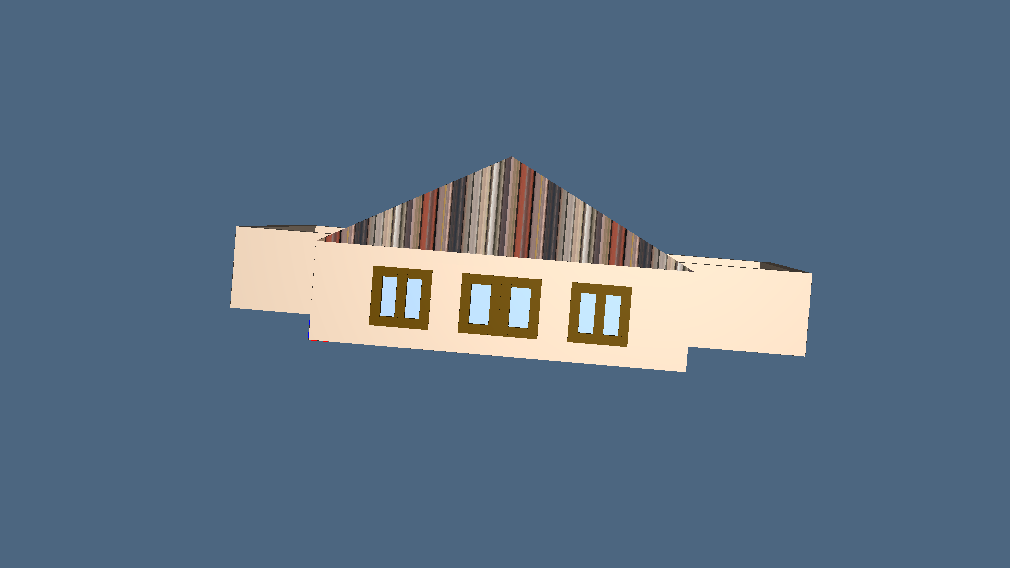
[vistavert.png](img/vistavert.png)

In [ ]:
"""Crea attraverso Una funzione CIRCLE che crea una frazione di cerchio e la funzione chiocciola 
    una struttura simile ad una scala a Chiocciola"""
def CIRCLE(R):
  """
  >>> CIRCLE(1.0)([8,8]).box()
  Box([-1.0, -1.0], [1.0, 1.0])
  """
  def CIRCLE0(subs):
    N , M = subs
    domain= POWER([INTERVALS(PI/9)(N), INTERVALS(R)(M)])
    fun=lambda p: [p[1]*cos(p[0]),p[1]*sin(p[0])]
    return MAP(fun)(domain)
  return CIRCLE0
def chiocciola(h,w,n):
    s=POWER([CIRCLE(5)([32,32]),QUOTE([1])])
    s=TEXTURE("texture/ARGHONA.jpg")(s)
    c=MY_CYLINDER([1,1])(32)
    c=TEXTURE("texture/ALUMOX.jpg")(c)
    step=[s]
    step.append(T([1,3])([0,-w]))
    step.append(R([1,2])(PI/9))
    step.append(T(3)(1)(c))
    return T(3)((n-1)*h)(COMP([STRUCT, NN(n)])(step))
#VIEW(chiocciola(10,1,10))

# Scala a chiocciola
![scala%20a%20chiocciola%20vista%20superiore.png](img/scala%20a%20chiocciola%20vista%20superiore.png)

In [ ]:
piano=mettiporte()
pianofin=COLOR([0.9,0.8,0.7])(mettifinestre(piano))
pianofin=posizionafinestre(pianofin,0)
#VIEW(pianofin)
pianofin=porticatofrontale(pianofin)
pianofin=pavimento(pianofin)
#VIEW(pianofin)
scala=R([1,2])(-PI/2)(chiocciola(22,1,22))
scala2=scala
scala=S([1,2,3])([0.5,0.5,0.5])(scala)
scala2=S([1,2,3])([0.5,0.5,0.5])(scala2)

pianofin=STRUCT([pianofin,T([1,2,3])([23,49.5,-220])(scala),T([1,2,3])([49,49.5,-220])(scala2)])
pianofin=soffitto(pianofin)
#VIEW(pianofin)
pianocolonnato=colonnato(pianofin)
pianoterra=triangolo(pianocolonnato)
pianoterra=completamentopianoterra(pianoterra)
#VIEW(pianoterra)
c=Gable(1,16,4.75)
c=COLOR(WHITE)(c)


#VIEW(pianoterra)
attic =firstfloor(20)
attic =posizionafinestre(attic,1)
#VIEW(attic)
scala=R([1,2])(-PI/2-((PI/9)*9))(chiocciola(40,1,40))
scala2=scala
scala=S([1,2,3])([0.5,0.5,0.5])(scala)
scala2=S([1,2,3])([0.5,0.5,0.5])(scala2)

attic=STRUCT([attic,T([1,2,3])([23,43.5,-760.5])(scala),T([1,2,3])([49,43.5,-760.5])(scala2)])

attic=soffittoatt(attic,20)
#VIEW(STRUCT([pianoterra,T([2,3])([14,11])(attic)]))

mansardas=mansarda(8)
mansardas=soffittoatt(mansardas,8)
mansardas=posizionafinestre(mansardas,3)
#VIEW(mansardas)
tettos=TEXTURE(["texture/tetto2.jpg",True,True,0.0,0.0,0.0,4.0,4.0,0.0,0.0])(tetto())
tettos= STRUCT([tettos,T([1,2])([13,5])(camino(5,8)),T([1,2])([13,36])(camino(5,8)),
                  T([1,2])([58,5])(camino(5,8)),T([1,2])([58,36])(camino(5,8))])
tettos=STRUCT([tettos,T([1,2,3])([20,13,2])(caminorett(6)),T([1,2,3])([20,31,2])(caminorett(6))
                 ,T([1,2,3])([50,31,2])(caminorett(6)),T([1,2,3])([50,13,2])(caminorett(6))])
edificio=STRUCT([pianoterra,T([2,3])([14,11])(attic),T([2,3])([14,31])(mansardas)])
#VIEW(edificio)
edificio=STRUCT([edificio,T([2,3])([14,39])(tettos)])
edificio=STRUCT([edificio,T([1,2,3])([26,14,39])(pianocroce(5))])

VIEW(edificio)


In [ ]:
def createTree():
    
    trunk = CYLINDER([1,12])(200)
    trunk = TEXTURE("texture/tronco.jpg")(trunk)
    foliage = SPHERE(4.5)([8,8])
    foliage = TEXTURE("texture/foglie.jpg")(foliage)
    tree = STRUCT([trunk,T(3)(10),foliage])

    return tree
#VIEW(createTree())
albero=createTree()
alberi=STRUCT([T([1,2])([6,10])(albero),T([1,2])([6,20])(albero),T([1,2])([6,30])(albero),T([1,2])([6,40])(albero),T([1,2])([6,50])(albero),
              T([1,2])([6,60])(albero),T([1,2])([6,70])(albero),T([1,2])([6,80])(albero),T([1,2])([6,90])(albero),T([1,2])([6,100])(albero),
              T([1,2])([96,10])(albero),T([1,2])([96,20])(albero),T([1,2])([96,30])(albero),T([1,2])([96,40])(albero),T([1,2])([96,50])(albero),
              T([1,2])([96,60])(albero),T([1,2])([96,70])(albero),T([1,2])([96,80])(albero),T([1,2])([96,90])(albero),T([1,2])([96,100])(albero)])
esterno1=CUBOID([16,106,1])
esterno2=CUBOID([16,106,1])
esterno3=CUBOID([16,44,1])
esterno4=CUBOID([16,44,1])
esterno5=CUBOID([39,32,1])
esterno6=CUBOID([71,16,1])
esterno=STRUCT([esterno1,T(1)(16)(esterno3),T(1)(32)(esterno5),T(1)(70)(esterno4),T(1)(86)(esterno2),T([1,2])([16,90])(esterno6)])
esterno=TEXTURE("texture/erba.jpg")(esterno)
esternocomp=STRUCT([T(3)(1)(alberi),esterno])
VIEW(STRUCT([edificio,T([1,2,3])([-16,-32,-1])(esternocomp)]))

# Albero con Texture
![modello%20albero.png](img/modello%20albero.png)

# Foto casa con giardino 
![vistavert.png](img/vistavert.png)![vertcas.png](img/vertcas.png)![latgiard.png](img/latgiard.png)![frontgiardino.png](img/frontgiardino.png)![postgiardino.png](img/postgiardino.png)![postcasa.png](img/postcasa.png)![frontcasa.png](img/frontcasa.png)